In [1]:
import numpy as np
import pandas as pd

import json
from datetime import timedelta

In [3]:
params = {
    "phi": 0.5,  # 自回归系数
    "sigma": 1,  # 误差项的标准差
    "N": 5000,   # 时间步数
}
params_file_path = 'arma_params.json'
with open(params_file_path, 'w') as file:
    json.dump(params, file)
with open(params_file_path, 'r') as file:
    params = json.load(file)

In [4]:
params

{'phi': 0.5, 'sigma': 1, 'N': 5000}

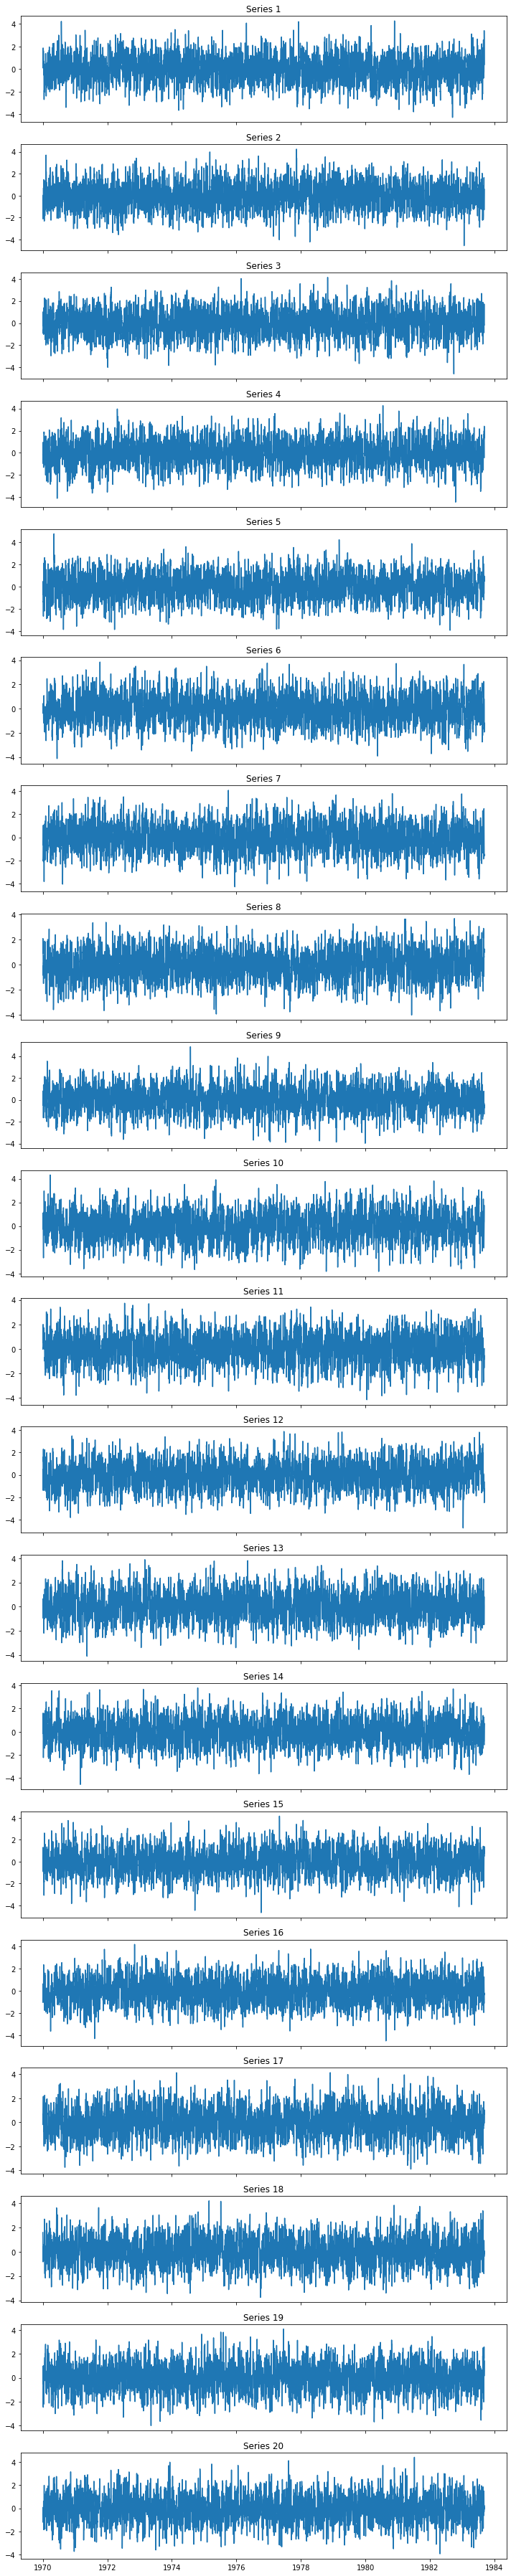

In [8]:
import matplotlib.pyplot as plt

phi = params["phi"]
sigma = params["sigma"]
N = params["N"]
simulated_series = np.zeros((N, 20))
np.random.seed(42)
for i in range(20):
    # 模拟单个AR(1)时间序列
    simulated_series[0,i] = np.random.normal(0, sigma)
    for t in range(1, N):
        simulated_series[t,i] = phi * simulated_series[t-1,i] + np.random.normal(0, sigma)
        
fig, axs = plt.subplots(20, 1, figsize=(10, 50), sharex=True)
for i in range(20):
    axs[i].plot(simulated_series[:, i])
    axs[i].set_title(f'Series {i+1}')
    axs[i].xaxis_date()  #
plt.tight_layout()
plt.show()

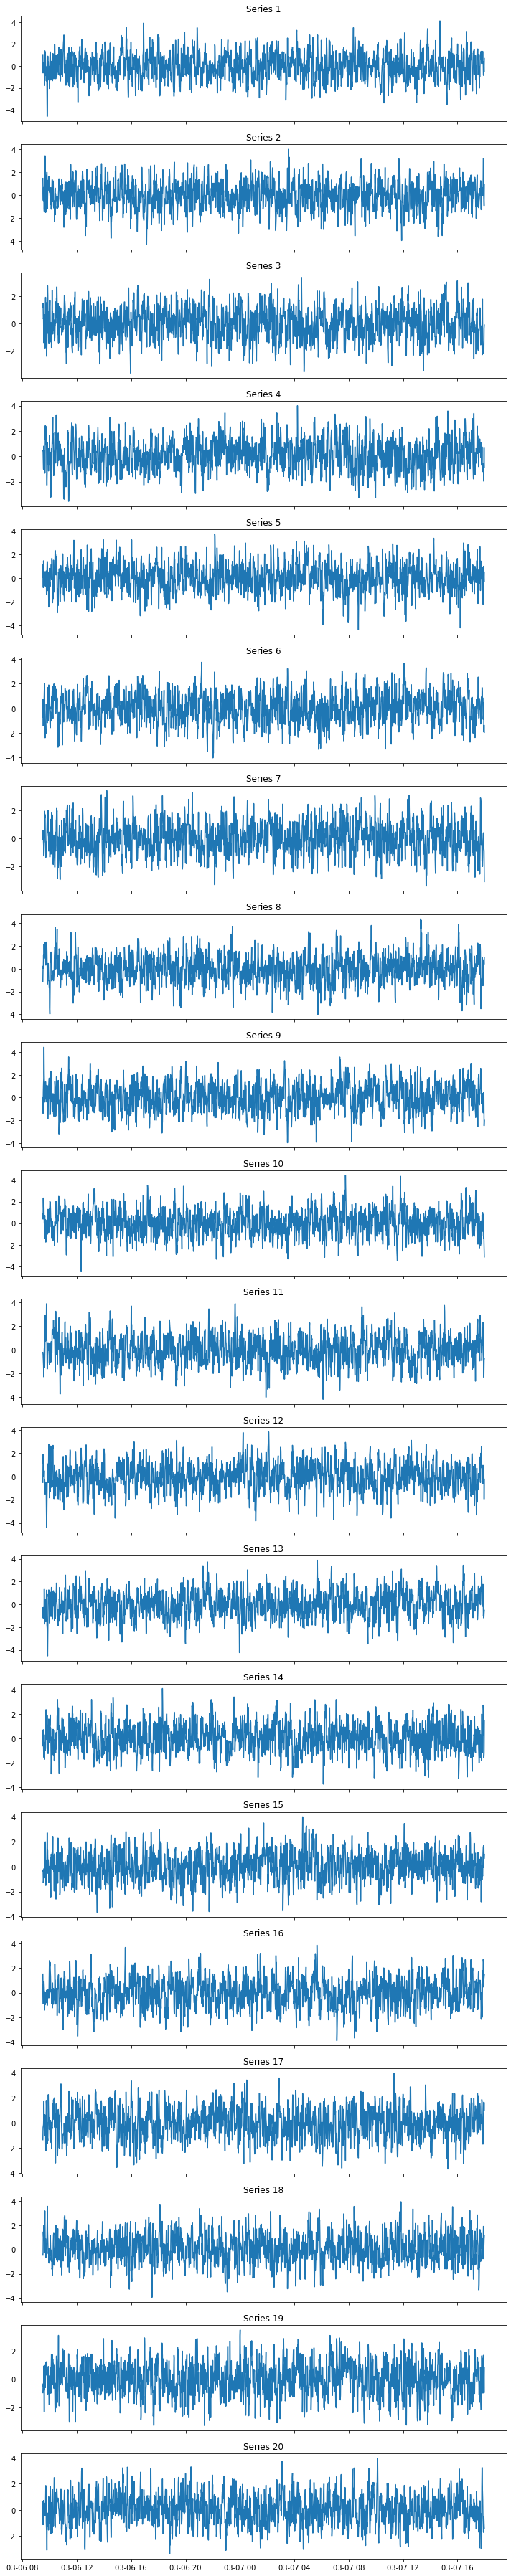

In [10]:
#  横坐标带有时间的

start_timestamp = pd.Timestamp("2000-03-06 09:30:00")
N = 5 #模拟5天
minutes_in_business_day = 390  # 一天的营业时间从9:30到15:00，共390分钟
continuous_business_hours = [start_timestamp + timedelta(minutes=x) for x in range(N * minutes_in_business_day)]


# 重新进行模拟
fig, axs = plt.subplots(20, 1, figsize=(10, 50), sharex=True)

for i in range(20):
    X = np.zeros(N * minutes_in_business_day)
    X[0] = np.random.normal(0, sigma)  # 初始化第一个值
    for t in range(1, N * minutes_in_business_day):
        X[t] = phi * X[t-1] + np.random.normal(0, sigma)  # AR(1)模型

    axs[i].plot(continuous_business_hours, X)
    axs[i].set_title(f'Series {i+1}')
    axs[i].xaxis_date()  # 确保x轴以日期格式显示

plt.tight_layout()
plt.show()

In [12]:
import statsmodels.api as sm
def estimate_phi_for_different_N(N, phi=0.5, sigma=1):
    # 创建时间序列
    continuous_business_hours = [start_timestamp + timedelta(minutes=x) for x in range(N * minutes_in_business_day)]
    
    # 模拟时间序列
    X = np.zeros(N * minutes_in_business_day)
    X[0] = np.random.normal(0, sigma)  # 初始化第一个值
    for t in range(1, N * minutes_in_business_day):
        X[t] = phi * X[t-1] + np.random.normal(0, sigma)  # AR(1)模型

    # 使用ARIMA模型估计参数
    model = sm.tsa.ARIMA(X, order=(1,0,0))
    model_fit = model.fit()
    return model_fit.arparams[0]

Ns = [5, 10, 20, 50, 100]
estimated_phis = [estimate_phi_for_different_N(N) for N in Ns]

D:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [13]:
estimated_phis = [estimate_phi_for_different_N(N) for N in Ns]
estimated_phis

[0.5053382603381515,
 0.5026856217746188,
 0.4841453442176431,
 0.5001845233166795,
 0.5035729278229396]